# 1. Import Liblary

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# 2. Import Data

In [3]:
# Mengimport data
london_crime = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
# Menampilkan 5 data paling atas
london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
# Menampilkan 5 data terakhir
london_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Total data yang tercatat sebanyak 13.490.604

## 2.1 Data Cleaning
___
    Dilakukan untuk menyederhanakan data atau mengurangi data yang tidak diperlukan. Karena nilai Value pada dataframe menunjukkan jumlah data kejahatan di wilayah tertentu pada bulan tertentu. Sehingga jika value bernilai '0', maka dapat disimpulkan tidak terjadi kejahatan pada wilayah tersebut. 

In [5]:
# deskripsi nilai di setiap kolom
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
# mengecek apakah terdapat missing value pada dataset
london_crime.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [7]:
# mengecek apakah terdapat data yang diduplikat pada dataset
london_crime.duplicated().sum()

0

Tidak terdapat data missing value dan data yang diduplikat. Mengambil data yang kolom 'Value' tidak bernilai 0 pada dataset

In [9]:
# Mengurangi baris data untuk value = '0' dan mereset index dari dataframe lama ke dataframe baru
london_crime = london_crime.query('value != 0').reset_index(drop=True)
london_crime.shape

(3419099, 7)

Terdapat 3.419.009 baris dan 7 kolom data yang dapat diolah untuk dianalisis. 

# 3. Analisis Data

   # Bar Plot
   ___
    3.1 Analisis banyaknya tingkat kejahatan yang terjadi di setiap daerah London pada tahun 2008 - 2016 

In [7]:
# Tingginya tingkat kejahatan yang terjadi setiap tahun dari tahun 2008 - 2016 berdasarkan setiap daerah di London
crime_borough = london_crime.drop(['lsoa_code', 'major_category', 'minor_category', 'year', 'month'], axis = 1).groupby('borough').sum()
crime_borough = crime_borough.sort_values(by = 'value', ascending = True)
crime_borough

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136
Merton,115654
Harrow,116848
Havering,138947
Barking and Dagenham,149447


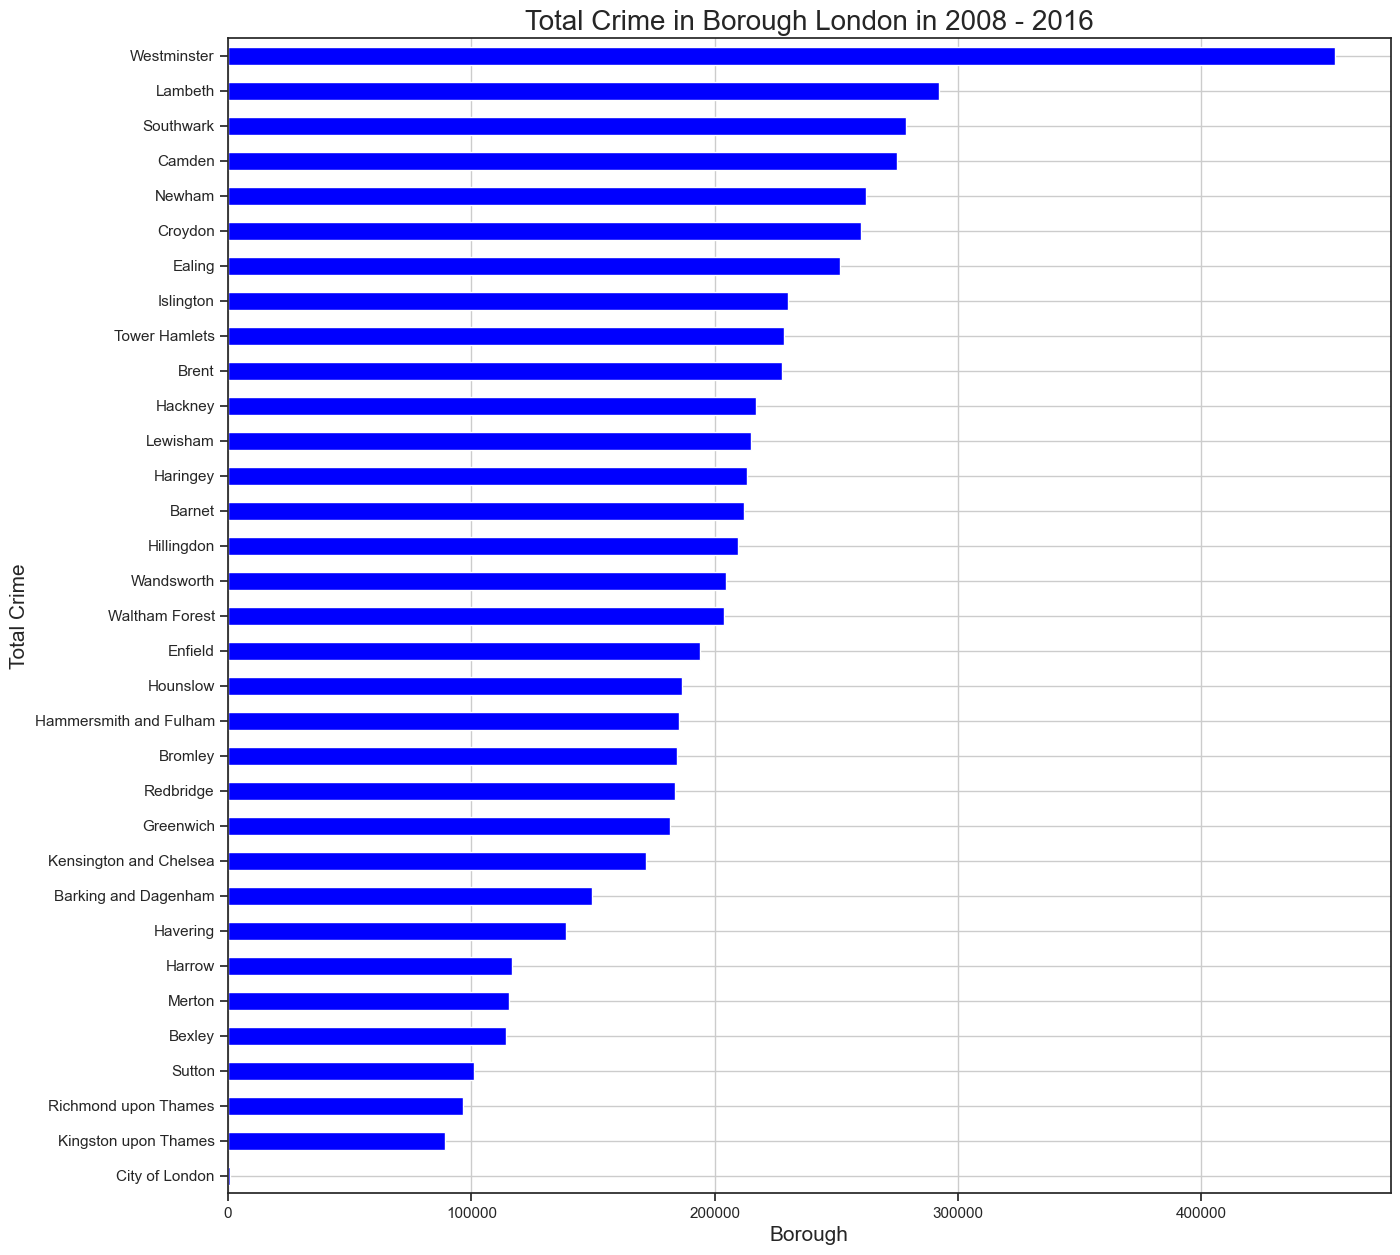

In [82]:
# Memvisualisasi data dengan barplot
crime_borough.plot(kind='barh', figsize=(15,15),legend = False, color='blue')
plt.title('Total Crime in Borough London in 2008 - 2016', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Total Crime', fontsize = 15)
plt.grid(True)
plt.show()

Berdasarkan visualisasi data menggunakan bar plot tersebut, dapat disimpulkan bahwa wilayah Westminster menjadi wilayah dengan jumlah kasus kejahatan tertinggi. Sedangkan di wilayah City of London mememiliki jumlah kasus kejahatan terkecil dari tahun 2008 hingga 2016.

   # Histogram
   ___
    3.2 Frekuensi wilayah di London dengan besarnya tingkat kriminalitas yang terjadi pada tahun 2008 hingga 2016


In [9]:
# Tingginya tingkat kejahatan yang terjadi setiap tahun dari tahun 2008 - 2016 berdasarkan setiap daerah di London
crime_borough = london_crime.drop(['lsoa_code', 'major_category', 'minor_category', 'year', 'month'], axis = 1).groupby('borough').sum()
crime_borough = crime_borough.sort_values(by = 'value', ascending = True)
crime_borough.head()

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136


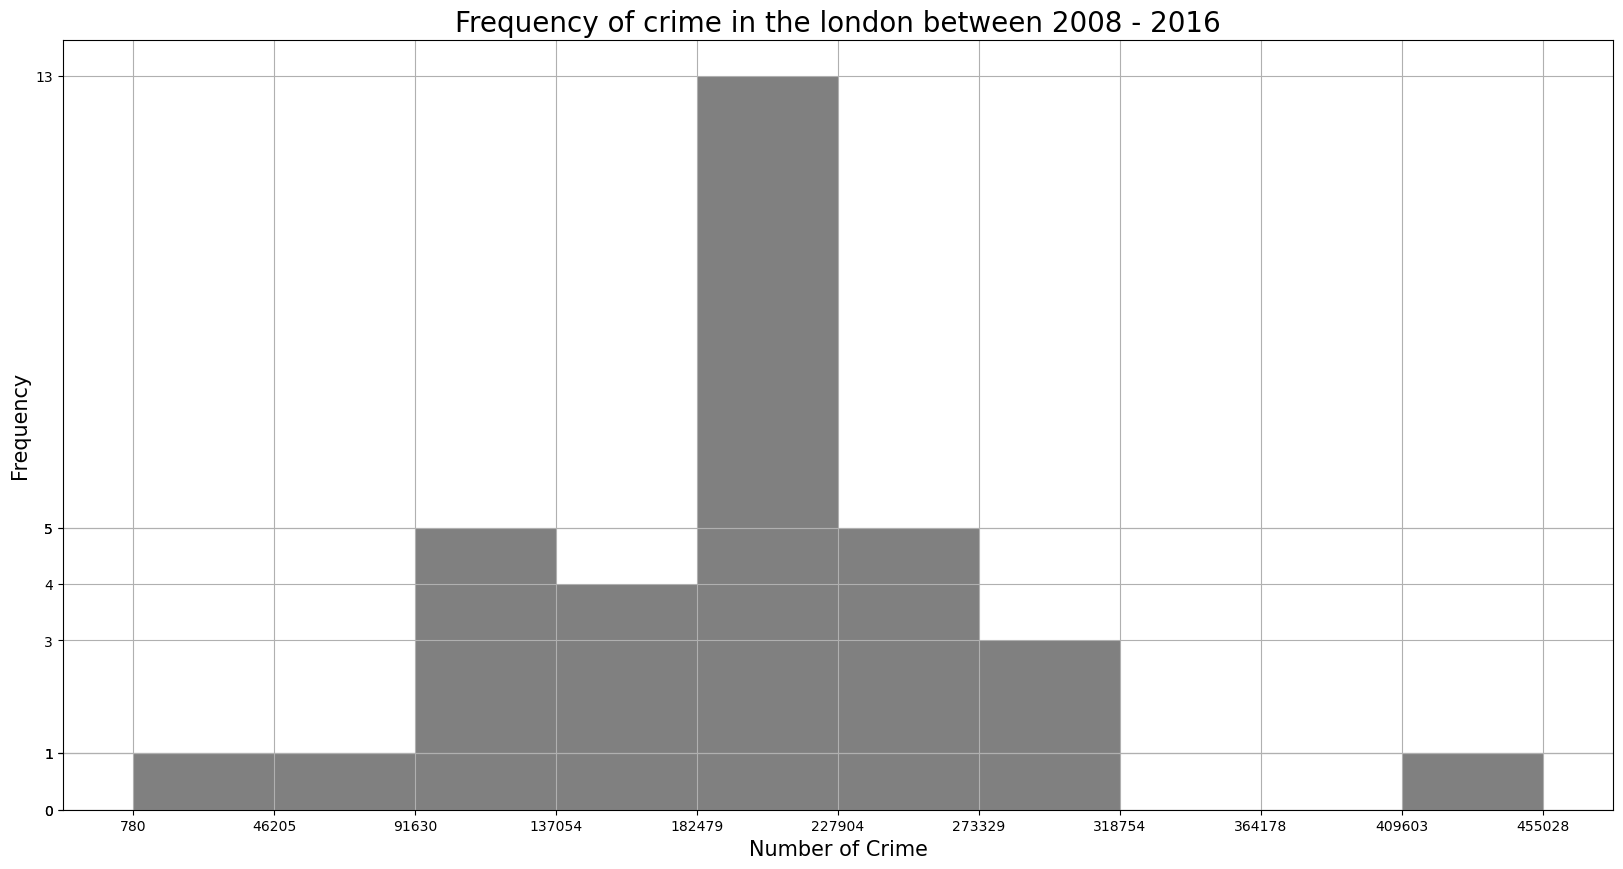

In [10]:
# Membuat bin
count, bin_edges = np.histogram(crime_borough)

# Membuat Histogram
crime_borough.plot(kind = 'hist',
             figsize = (20,10),
             xticks = bin_edges,
             yticks = count,
             legend = False,
             color = 'grey')
plt.title('Frequency of crime in the london between 2008 - 2016', fontsize = 20)
plt.xlabel('Number of Crime', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.grid(True)
plt.show()

Dari visualisasi dengan Histogram tersebut, dapat disimpulkan terdapat 13 wilayah di London dengan tindak kriminalitas 182479 hingga 227904 kejadian. Hanya 1 wilayah dengan tindak kriminalitas tertinggi antara 409603 hingga 455028 kejadian. dan hanya terdapat 1 wilayah dengan tindak kriminalitas terendah antara 780 hingga 46205 kejadian. 

# Area Plot
___
        3.3 Lima wilayah dengan catatan kriminalitas paling banyak di London dilihat dari trend setiap tahun dari tahun 2008 hingga 2016

In [78]:
# Mengambil data dengan tingkat kejahatan terbesar di 5 wilayah london
top5_borough = london_crime.drop(['lsoa_code', 'major_category', 'minor_category', 'year', 'month'], axis = 1).groupby('borough').sum()
top5_borough = crime_borough.sort_values(by = 'value', ascending = False).head(5)
top5_borough

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [79]:
# data dilihat berdasarkan tahun kejadian
top5borough = london_crime.drop(['lsoa_code', 'major_category', 'minor_category', 'month'], axis = 1).set_index('borough')
top5borough = top5borough.loc[top5_borough.index]
top5borough = pd.pivot_table(top5borough, values='value', aggfunc=np.sum, index='year', columns='borough')
top5borough

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


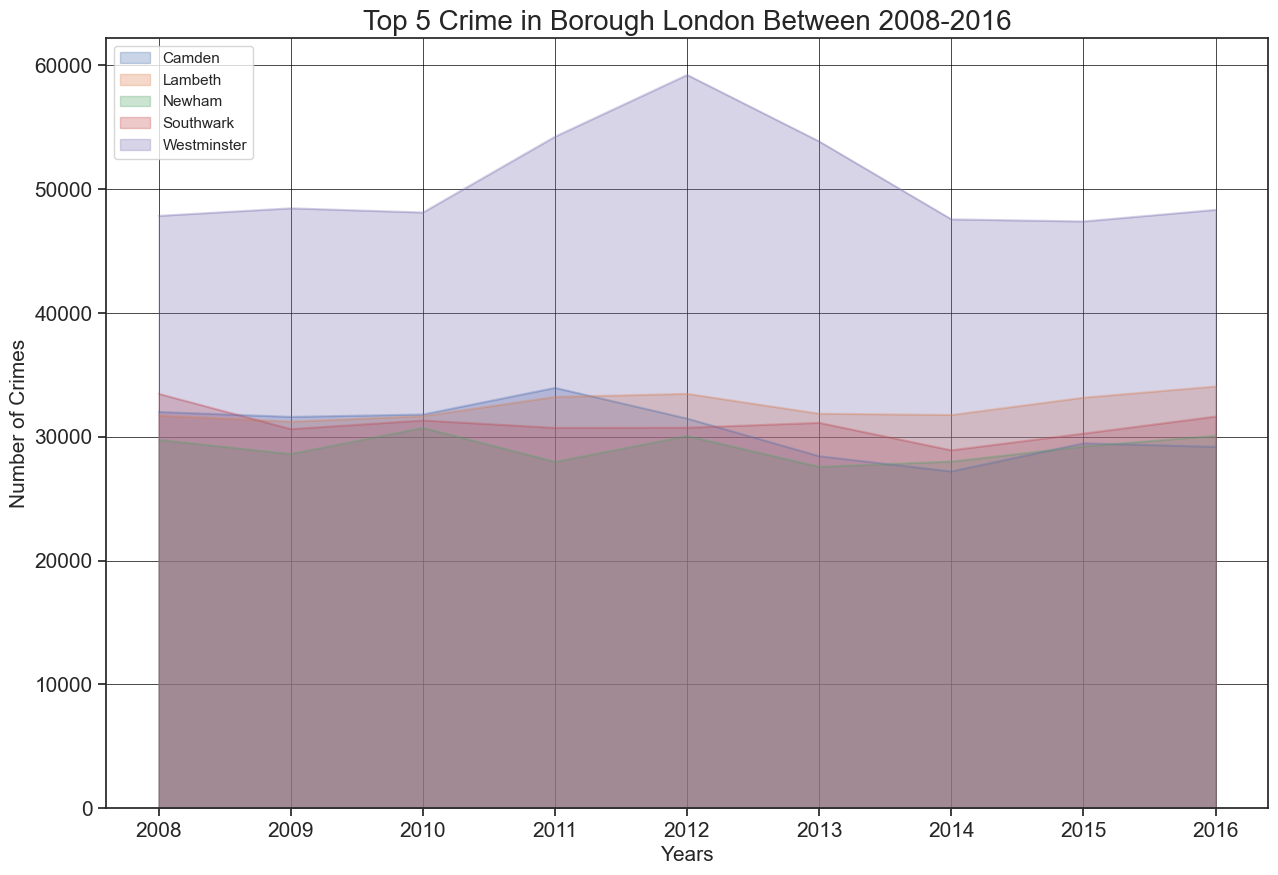

In [80]:
# Memvisualisasikan data dengan Area Plot
top5borough.index = top5borough.index.map(int)

top5borough.plot(kind='area',
                 alpha=0.3,
                 stacked=False,
                 figsize=(15,10))
plt.title('Top 5 Crime in Borough London Between 2008-2016', fontsize = 20)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Number of Crimes', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(color = 'black', linewidth = 0.5)
plt.legend(loc = "upper left")
plt.show()

Berdasarkan visualisasi data dengan menggunakan area plot tersebut, dapat disimpulkan kejahatan di 5 wilayah London terbanyak di Westminster, Camden, Lambeth, Southwark, dan Newham. Jumlah kejahatan di wilayah Westminster mengalami kenaikan yang tercatat pada tahun 2010 hingga 2012 dan mulai menurun hingga 2016. Namun pada wilayah lainnya mengalami trend kenaikan dan penurunan jumlah yang tidak signifikan. 

# Pie Chart
___
    3.4 Persentase Jenis Kejahatan di London Berdasarkan Major Crime Category dari tahun 2008 - 2016


In [52]:
# Mengelompokkan data berdasarkan jumlah major crime category di wilayah Westminster
major_crime = london_crime. drop(['lsoa_code','minor_category', 'year', 'month'], axis = 1).set_index('borough')
major_crime = major_crime.groupby('major_category').size()
major_crime

major_category
Burglary                        441209
Criminal Damage                 466268
Drugs                           231894
Fraud or Forgery                  2682
Other Notifiable Offences        80569
Robbery                         163549
Sexual Offences                   1075
Theft and Handling             1136994
Violence Against the Person     894859
dtype: int64

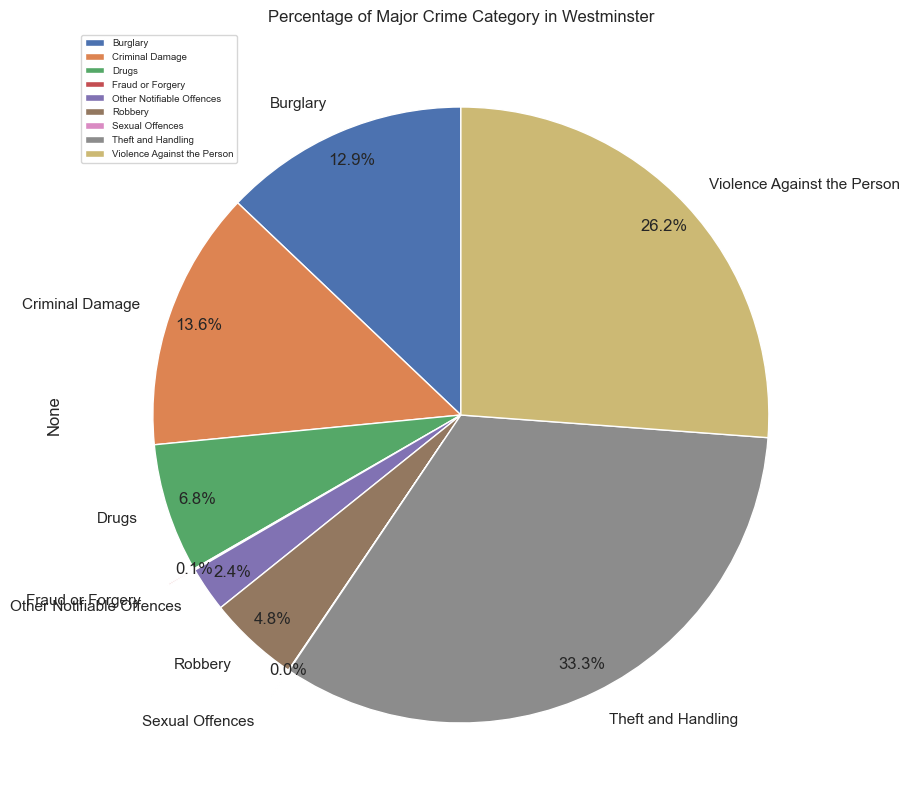

In [85]:
# Membuat pie chart
major_crime.plot(kind = 'pie',
                 figsize = (10, 10),
                 autopct = '%1.1f%%',
                 startangle = 90,
                 explode = [0, 0, 0, 0.1, 0, 0, 0.1, 0, 0],
                 pctdistance=0.9)
plt.title('Percentage of Major Crime Category in Westminster')
plt.legend(labels = major_crime.index, loc='upper left', prop = {"size":7})
plt.show()

Berdasarkan visualisasi dengan pie chart tersebut, dapat disimpulan untuk jenis kejahatan bersasarkan kategori major terbanyak pada tahun 2008 hingga 2016 adalah Theft and Handling sebesar 33.3% dan terkecil adalah sexual offences presentasenya hingga 0.0% dibanding kategori lainnya namun masih terjadi di wilayah London. 

# Scatter Plot
___
    3.5 Analisis Kejahatan berdasarkan Minor Category yang Termasuk dalam Theft and Handling pada Tahun 2008 - 2016


In [47]:
# Pengelompokan data berdasar major category = 'Theft and Handling'
minor_crime = london_crime[['year','borough', 'major_category', 'minor_category', 'value']].loc[
    (london_crime['major_category']=='Theft and Handling')]
minor_crime.head()

,year,borough,major_category,minor_category,value
0,2016,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1
1,2009,Barking and Dagenham,Theft and Handling,Other Theft Person,1
2,2012,Ealing,Theft and Handling,Other Theft Person,2
6,2014,Croydon,Theft and Handling,Other Theft,1
7,2008,Bexley,Theft and Handling,Theft/Taking Of Motor Vehicle,1


In [48]:
# mengelompokkan minor kategory berdasarkan tahun dan menjumlah data 
minor_crime = minor_crime[['year','minor_category', 'value']].groupby(['year','minor_category']).agg({'value':'sum'})
minor_crime.head(40)

value
year minor_category                                
2008 Handling Stolen Goods                     2466
     Motor Vehicle Interference & Tampering    3868
     Other Theft                              99280
     Other Theft Person                       24453
     Theft From Motor Vehicle                 76570
     Theft From Shops                         32857
     Theft/Taking Of Motor Vehicle            28303
     Theft/Taking of Pedal Cycle              15895
2009 Handling Stolen Goods                     1907
     Motor Vehicle Interference & Tampering    4210
     Other Theft                              95424
     Other Theft Person                       27549
     Theft From Motor Vehicle                 68856
     Theft From Shops                         36349
     Theft/Taking Of Motor Vehicle            24476
     Theft/Taking of Pedal Cycle              20721
2010 Handling Stolen Goods                     1714
     Motor Vehicle Interference & Tampering    4406
     Other Theft                             103997
     Other Theft Person                       29547
     Theft From Motor Vehicle                 69709
     Theft From Shops                         36935
     Theft/Taking Of Motor Vehicle            24890
     Theft/Taking of Pedal Cycle              19726
2011 Handling Stolen Goods                     2104
     Motor Vehicle Interference & Tampering    4481
     Other Theft                             113616
     Other Theft Person                       36090
     Theft From Motor Vehicle                 69604
     Theft From Shops                         36351
     Theft/Taking Of Motor Vehicle            26161
     Theft/Taking of Pedal Cycle              20885
2012 Handling Stolen Goods                     1737
     Motor Vehicle Interference & Tampering    5113
     Other Theft                             132056
     Other Theft Person                       46585
     Theft From Motor Vehicle                 68198
     Theft From Shops                         36562
     Theft/Taking Of Motor Vehicle            22464
     Theft/Taking of Pedal Cycle              21339

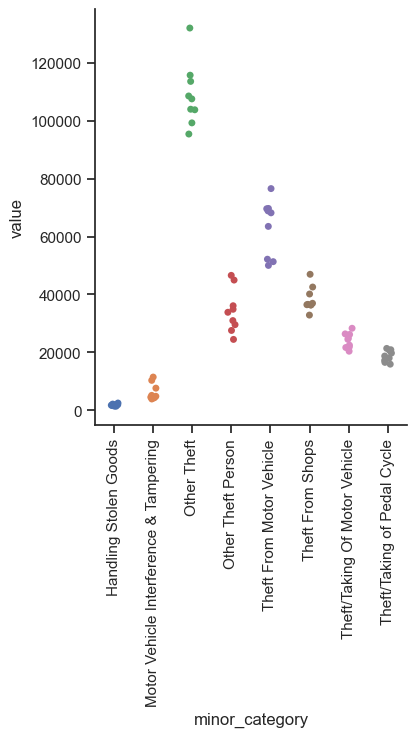

In [49]:
# Membuat scatter plot
sns.set_theme(style="ticks", color_codes=True)
minor_plot = sns.catplot(x="minor_category", y="value", data=minor_crime.reset_index())
minor_plot.set_xticklabels(rotation=90)

Berdasarkan visualsasi data dengan scatter plot, diperoleh bahwa angka kejadian kejahatan berupa Handling Stolen Goods dan Motor Vehicle Interference & Tampering lebih rendah dibanding dengan kejadian yang tergolong other Theft.

# Lineplot dan Boxplot
___
    3.6 Trend Kejahatan yang tergolong Other Theft di wilayah Westminster pada tahun 2010 - 2012


Karena wilayah yang memiliki catatan kriminalitas terbanyak terdapat di Westminer dan data menunjukan bahwa kejahatan tertinggi di wilayah tersebut terjadi kenaikan pada tahun 2010 hingga 2012. Sedangkan pada dataset, golongan kejahatan other theft sering terjadi. Selanjutnya akan dilihat trend range tindak kriminal yang tergolong dalam Other Theft di wilayah Westminster pada tahun 2012. 


In [99]:
# Mengelompokkan data berdasarkan tahun 2012
ws_crime_2012 = london_crime[london_crime['year'] == 2012]
ws_crime_2012

,lsoa_code,borough,major_category,minor_category,value,year,month
2,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
9,E01002977,Kingston upon Thames,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,3
15,E01002093,Haringey,Violence Against the Person,Harassment,1,2012,3
26,E01003974,Southwark,Criminal Damage,Criminal Damage To Dwelling,1,2012,1
34,E01001012,Croydon,Theft and Handling,Theft From Motor Vehicle,9,2012,4
...,...,...,...,...,...,...,...
3419078,E01000292,Barnet,Theft and Handling,Theft From Shops,3,2012,6
3419081,E01003945,Southwark,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,7
3419082,E01001793,Hackney,Criminal Damage,Criminal Damage To Other Building,1,2012,7
3419085,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6


In [91]:
# Mengkelompokkan data berdasarkan minor kategori di Westminster 
ws_minor_2012 = ws_crime_2012[['year', 'month', 'borough', 'minor_category', 'value']].loc[
    (london_crime['borough'] == 'Westminster') & (london_crime['minor_category'] == 'Other Theft')]
ws_minor_2012

,year,month,borough,minor_category,value
215,2012,7,Westminster,Other Theft,1
1007,2012,2,Westminster,Other Theft,5
5923,2012,11,Westminster,Other Theft,38
15064,2012,4,Westminster,Other Theft,5
20038,2012,4,Westminster,Other Theft,4
...,...,...,...,...,...
3413569,2012,4,Westminster,Other Theft,44
3413715,2012,6,Westminster,Other Theft,2
3415377,2012,4,Westminster,Other Theft,2
3418363,2012,4,Westminster,Other Theft,1


In [92]:
# Menjumlahkan data value
ws_minor_2012 = ws_minor_2012[['year', 'month', 'value']].groupby(['year','month']).agg({'value':'sum'})
ws_minor_2012

value
year month       
2012 1       1816
     2       1531
     3       1938
     4       1491
     5       1678
     6       1597
     7       1691
     8       1559
     9       1309
     10      1594
     11      1619
     12      1733

Text(0.5, 0, 'Month')

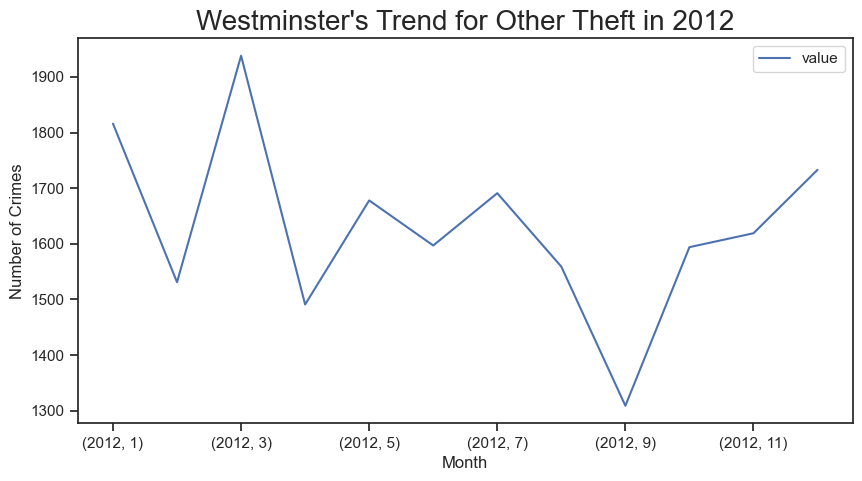

In [93]:
# line plot untuk melihat trend kejahatan golongan other theft di 2012 setiap bulannya
ws_minor_2012.plot(kind = 'hist', figsize = (10,5))
plt.title("Westminster's Trend for Other Theft in 2012", fontsize=20)
plt.ylabel("Number of Crimes")
plt.xlabel("Month")

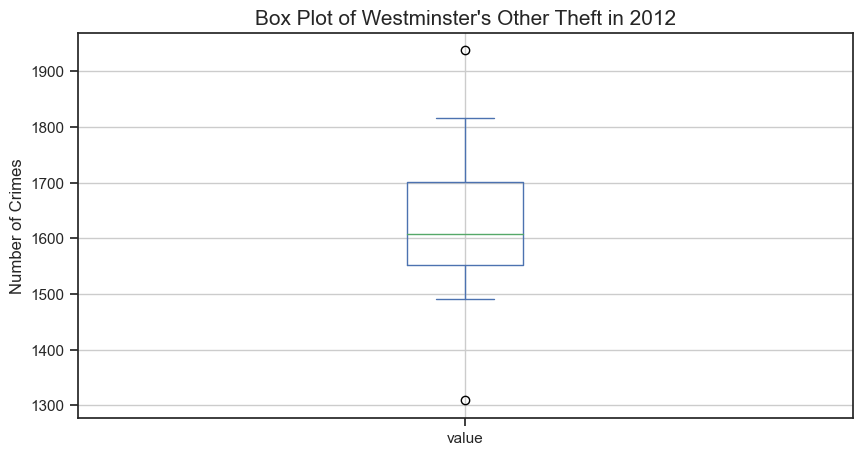

In [100]:
# Boxplot
ws_minor_2012.plot(kind='box', figsize=(10,5))
plt.title("Box Plot of Westminster's Other Theft in 2012", fontsize=15)
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

Dari visualisasi data dengan menggunakan boxplot, dapat disimpulkan bahwa besar kejadian tindak kejahatan type other theft di Westminster pada 2012 dengan kurang lebih sebesar 1600 kejadian. Dengan angka kejadian terendah kurang lebih sebesar 1300 kejadian. 

# Folium Maps
___
    3.7 Tingkat Kejahatan di London jika Dilihat dengan menggunakan Maps


In [11]:
london_map = folium.Map(location=[51.507351, -0.127758], zoom_start=10)
london_map

In [14]:
london_crime_borough = london_crime[['borough','value']]
london_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
london_crime_map = folium.Map(location=[51.507351, -0.127758], zoom_start=10)
folium.Choropleth(
    geo_data = london_geo,
    data = london_crime_borough,
    columns = ["borough", "value"],
    key_on = "feature.properties.name",
    fill_color = "YlOrRd",
    fill_opacity = 0.5,
    line_opacity = 0.2,
    legend_name = "Crime rate in boroughs of London",
    highlight = True,
).add_to(london_crime_map)

london_crime_map

Berdasarkan peta geografi London, bar kuning hingga merah tua menunjukkan tingkat banyaknya kejadian kriminalitas di London. Jika warnanya semakin gelap menunjukkan semakin tinggi tingkat kriminalitas. Terlihat pada wilayah Westminster memiliki warna merah tua berarti wilayah tersebut memiliki tingkat kejahatan tinggi dibanding wilayah lain di London. 

# 4. Word Clouds

In [45]:
# Menginstal Liblary wordcloud
!conda install -c conda-forge wordcloud --yes

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\KARINA\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |     pyhd8ed1ab_0         296 KB  conda-forge
    conda-23.3.0               |   py39haa95532_0         949 KB
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.2.2          |   py39hb82d6ee_0         187 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  boltons            conda-forge/noarch::boltons-23.0.0-pyhd8ed1ab_0 
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 
  wordcloud          conda-forge/win-64::wordcloud-

In [74]:
# Mengimport Liblary wordcloud
from wordcloud import WordCloud, STOPWORDS

In [130]:
# Menggunakan data kriminalitas berdasarkan wilayah di London 
crime_borough = london_crime.drop(['lsoa_code', 'major_category', 'minor_category', 'year', 'month'], axis = 1).groupby('borough').sum()
crime_borough

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [131]:
total_word = crime_borough['value'].sum()
total_word

6447758

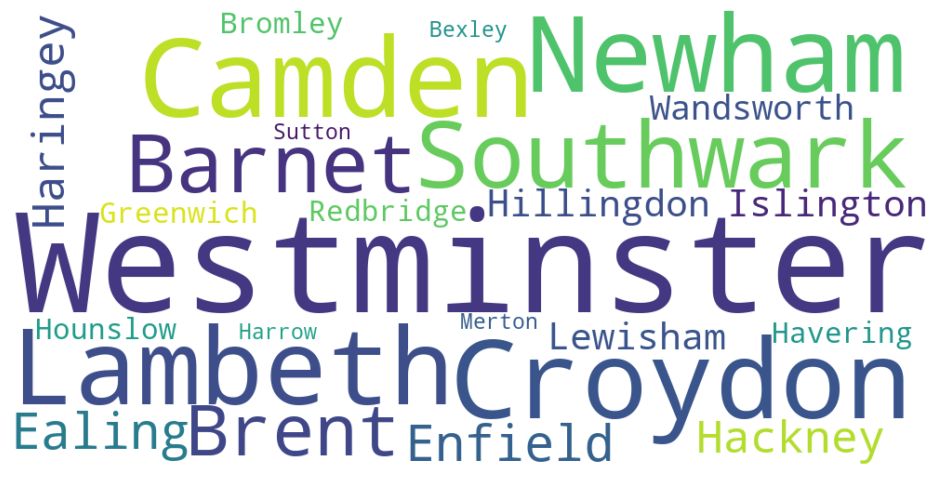

In [139]:
# Membuat word clouds
max_word = 100
word_london = ''
for borough in crime_borough.index.values:
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(crime_borough.loc[borough, 'value']/float(total_word)*max_word)
        word_london = word_london + ((borough + ' ')* repeat_num_times)

word_london
wordcloud = WordCloud(width = 1000, height = 500, 
                      max_font_size = 200, 
                      background_color = 'white')

# Generate argumen dari data
wordcloud.generate(word_london)

# Menampilkan gambar word clouds dari data
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Wordcloud digunakan untuk memvisualisasikan kata yang sering muncul dalam text atau data. Dari hasil visualisasi dengan wordcloud dapat di simpulkan kata atau wilayah Westminster paling sering muncul. 

# Kesimpulan Analisis
___

- Hasil analisis diambil dari dataset catatan kriminalitas di London dari tahun 2008 hingga 2016
    1. Di London wilayah yang memiliki catatan tingkat kriminalitas terbanyak pada tahun tersebut adalah Westminster, Lambeth, Southwark, Camden, dan Newham.
    2. Terdapat 13 wilayah di London dengan tindak kriminalitas 182479 hingga 227904 kejadian. 
    3. Angka kriminalitas berubah ubah dengan tidak signifikan setiap tahunnya di setiap wilayah London.
    4. Type kejahatan major yang sering terjadi adalah Theft and Handling, Violance against the Person, dan Criminal Damage. Sedangkan Type kejahatan major yang jarang terjadi adalah Fraud or Forgery dan Sexual Offences. 
    5. Type kejahatan kategori major dikelompokkan lagi berdasarkan type kejahatan minor. Pada type kejahatan Theft and Handling, type kejahatan minor yang sering terjadi adalah type Other Theft. Sedangkan Type kejahatan minor yang jarang terjadi dari kelompok ini adalah Handling Stolen Goods.
    6. Pada tahun 2012 di wilayah Westminster memiliki catatan kejahatan tertinggi, dimana angka kejahatan dapat mencapai kurang lebih 1900 kejadian pada 1 bulan dan rata rata kejahatan yang terjadi di wilayah tersebut dapat mencapai kurang lebih 1600 kejadian. Kejadian kriminalitas terkecil pada tahun 2012 hanya mencapai kurang lebih 1300 kejadian. 
    7. Tingkat kriminalitas dapat divisualisasikan dengan menggunakan peta. Wilayah yang berwarna gelap memiliki tingkat kejahatan tertinggi. Tertera pada peta London, wilayah yang memiliki kriminalitas tertinggi berwarna gelap yaitu wilayah Westminster.  